In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#this is the activation function that i am using
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# the derivative of the activation function is taken for the back propagation
def gradient_descent(x):
    return x * (1 - x)

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.rand(input_size) 
        self.bias = np.random.rand(1) 
        self.learning_rate = learning_rate
    
    def predict(self, inputs):
        linear_output = np.dot(inputs, self.weights) + self.bias
        return sigmoid(linear_output) 
    
    def train(self, inputs, targets, epochs=100000):
        for epoch in range(epochs):
            for x, target in zip(inputs, targets):
                prediction = self.predict(x)
                error = target - prediction
                self.weights += self.learning_rate * error * x * gradient_descent(prediction)
                self.bias += self.learning_rate * error * gradient_descent(prediction)

                
x_vector = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1])
input_size = 2
epochs = 100000
perceptron_and = Perceptron(input_size)
perceptron_and.train(x_vector, y_and, epochs)
print("AND GATE PREDICTION")
for x, y in zip(x_vector,y_and):
    print(f"Input: {x} -> Predicted: {perceptron_and.predict(x)} -> Actual : {y}")
perceptron_or = Perceptron(input_size)
perceptron_or.train(x_vector, y_or, epochs)
print("OR GATE PREDICTION")
for x, y in zip(x_vector,y_or):
    print(f"Input: {x} -> Predicted: {perceptron_or.predict(x)} -> Actual : {y}")


AND GATE PREDICTION
Input: [0 0] -> Predicted: [5.47209638e-06] -> Actual : 0
Input: [0 1] -> Predicted: [0.01636301] -> Actual : 0
Input: [1 0] -> Predicted: [0.01636354] -> Actual : 0
Input: [1 1] -> Predicted: [0.98060984] -> Actual : 1
OR GATE PREDICTION
Input: [0 0] -> Predicted: [0.01628248] -> Actual : 0
Input: [0 1] -> Predicted: [0.98973875] -> Actual : 1
Input: [1 0] -> Predicted: [0.98973854] -> Actual : 1
Input: [1 1] -> Predicted: [0.99999822] -> Actual : 1


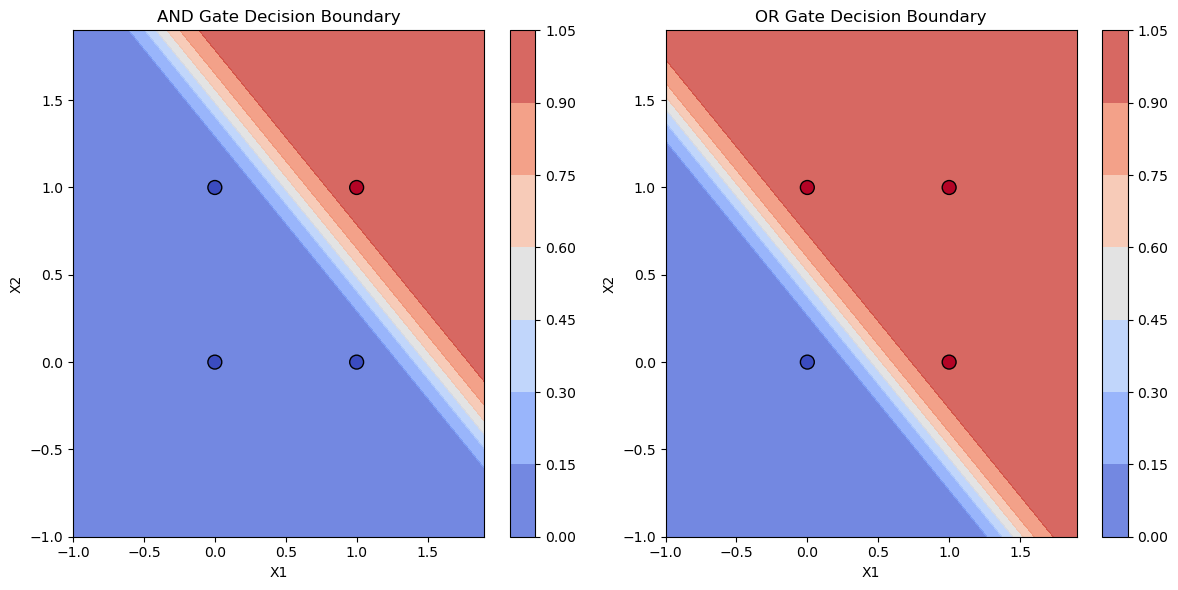

In [20]:
# Create a meshgrid for visualization by setting the max and min values as -1 and 2 appropriately. as the values are either way between 0 and 1
x_min, x_max = -1, 2
y_min, y_max = -1, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Flatten the meshgrid arrays of each x and y into a 1D array to pass them to the perceptron
xx_flat = xx.ravel()
yy_flat = yy.ravel()

# Stack the flattened meshgrid into a 2D array of input points that is coloumns will be of the x and rows will be y and they are transposed
grid_points = np.vstack((xx_flat, yy_flat)).T

# AND perceptron
predictions_and = perceptron_and.predict(grid_points)
predictions_and = predictions_and.reshape(xx.shape)  # Reshaping the predictions to match the meshgrid

# OR perceptron
predictions_or = perceptron_or.predict(grid_points)
predictions_or = predictions_or.reshape(xx.shape)  

# decision boundary
plt.figure(figsize=(12, 6))

# Subplot 1: AND gate
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, predictions_and, alpha=0.8, cmap='coolwarm')
plt.colorbar()
plt.scatter(x_vector[:, 0], x_vector[:, 1], c=y_and, s=100, edgecolors='k', cmap='coolwarm')
plt.title("AND Gate Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")

# Subplot 2: OR gate
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, predictions_or, alpha=0.8, cmap='coolwarm')
plt.colorbar()
plt.scatter(x_vector[:, 0], x_vector[:, 1], c=y_or, s=100, edgecolors='k', cmap='coolwarm')
plt.title("OR Gate Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")

plt.tight_layout()
plt.show()


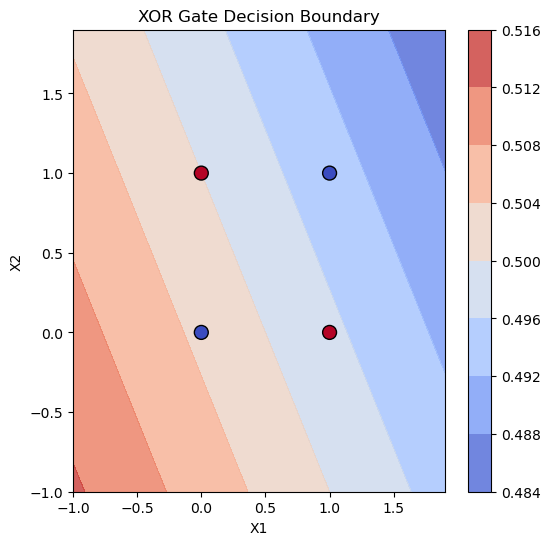

In [22]:
# XOR Gate data
y_xor = np.array([0, 1, 1, 0])
perceptron_xor = Perceptron(input_size)
perceptron_xor.train(x_vector, y_xor, epochs)
x_min, x_max = -1, 2
y_min, y_max = -1, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

xx_flat = xx.ravel()
yy_flat = yy.ravel()


grid_points = np.vstack((xx_flat, yy_flat)).T
predictions_xor = perceptron_xor.predict(grid_points)
predictions_xor = predictions_xor.reshape(xx.shape) 

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, predictions_xor, alpha=0.8, cmap='coolwarm')
plt.colorbar()
plt.scatter(x_vector[:, 0], x_vector[:, 1], c=y_xor, s=100, edgecolors='k', cmap='coolwarm')
plt.title("XOR Gate Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


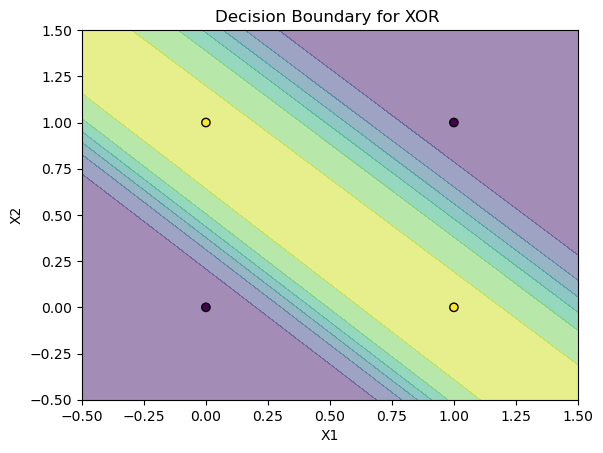

In [23]:
y_xor = np.array([0, 1, 1, 0]) 

# MLP Training function
def train_mlp(x_vector, y_xor, hidden_neurons=2, epochs=10000, lr=0.1):
    input_neurons = x_vector.shape[1]
    output_neurons = 1 
    
    # Initialize weights and biases for the hidden and output layers
    w1 = np.random.rand(input_neurons, hidden_neurons) 
    b1 = np.random.rand(hidden_neurons) 
    w2 = np.random.rand(hidden_neurons, output_neurons) 
    b2 = np.random.rand(output_neurons) 
    
    # Training loop
    for _ in range(epochs):
        # Forward propagation
        hidden_input = np.dot(x_vector, w1) + b1  # Input to hidden layer
        hidden_output = sigmoid(hidden_input)  # Output from hidden layer
        final_input = np.dot(hidden_output, w2) + b2  # Input to output layer
        final_output = sigmoid(final_input)  # Output from the network
        
        # Backpropagation
        error = y_xor.reshape(-1, 1) - final_output  # Calculate the error
        d_output = error * gradient_descent(final_output)  # Derivative of output layer
        d_hidden = d_output.dot(w2.T) * gradient_descent(hidden_output)  # Derivative of hidden layer
        
        # Update weights and biases using gradient descent
        w2 += hidden_output.T.dot(d_output) * lr  # Update weights for output layer
        b2 += np.sum(d_output, axis=0) * lr  # Update bias for output layer
        w1 += x_vector.T.dot(d_hidden) * lr  # Update weights for hidden layer
        b1 += np.sum(d_hidden, axis=0) * lr  # Update bias for hidden layer
    
    return w1, b1, w2, b2

# Train the MLP on XOR data
w1, b1, w2, b2 = train_mlp(x_vector, y_xor)

# MLP Prediction function
def mlp_predict(x_vector):
    hidden_input = np.dot(x_vector, w1) + b1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, w2) + b2
    return sigmoid(final_input)

# Visualize the decision boundary for XOR
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))  # Create meshgrid
Z = mlp_predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # Get predictions for each point
plt.contourf(xx, yy, Z, alpha=0.5)  # Plot the decision boundary
plt.scatter(x_vector[:, 0], x_vector[:, 1], c=y_xor, edgecolors='k', marker='o')  # Plot the training points
plt.title("Decision Boundary for XOR ")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
